In [47]:
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.display import display, Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, recall_score

import matplotlib.pyplot as plt

#### Загрузим данные и посмотрим на первые 5 записей.

In [4]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Посмотрим на базовые статистики датасета: средние, медианы, и т.д. По всем колонкам датасета и отдельно по выбранной.

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

#### Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

Обычно можно построить просто pairplot для начала EDA. При большом количестве параметров картинка получается мало информативна и строится довольно долго. 
### ВНИМАНИЕ!!! следующяя команда выполняется около 2х минут!

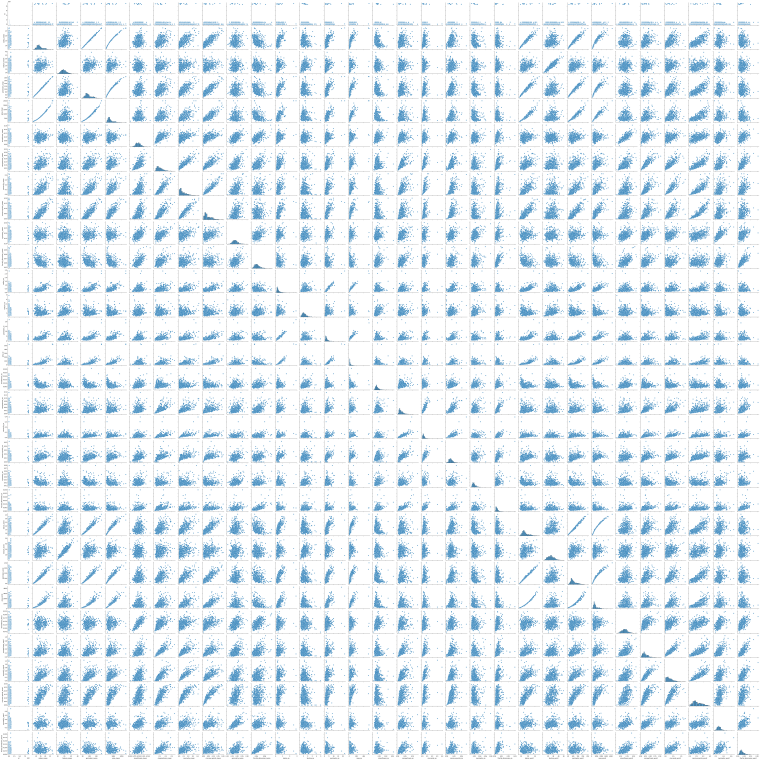

In [50]:
#sns.pairplot(data);
# Не будем ее выполнять, загрузим картинку )))
display(Image(filename='pairplot.png'))

In [7]:
# Проверим есть ли пропуски в данных.
data.isna().sum().sum()

0

#### Переведем переменную в бинарную и посмотрим на ее распределение.

In [8]:
label_encoder = LabelEncoder()
data.diagnosis = label_encoder.fit_transform(data.diagnosis)

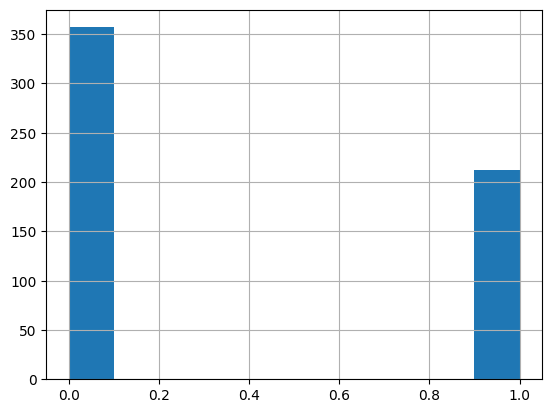

In [9]:
data.diagnosis.hist();

#### Построим гистограммы/распределения признаков относительно целевой переменной.

In [11]:
y_column = 'diagnosis'
X_columns = data.drop(columns=['id', 'diagnosis']).columns

X_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

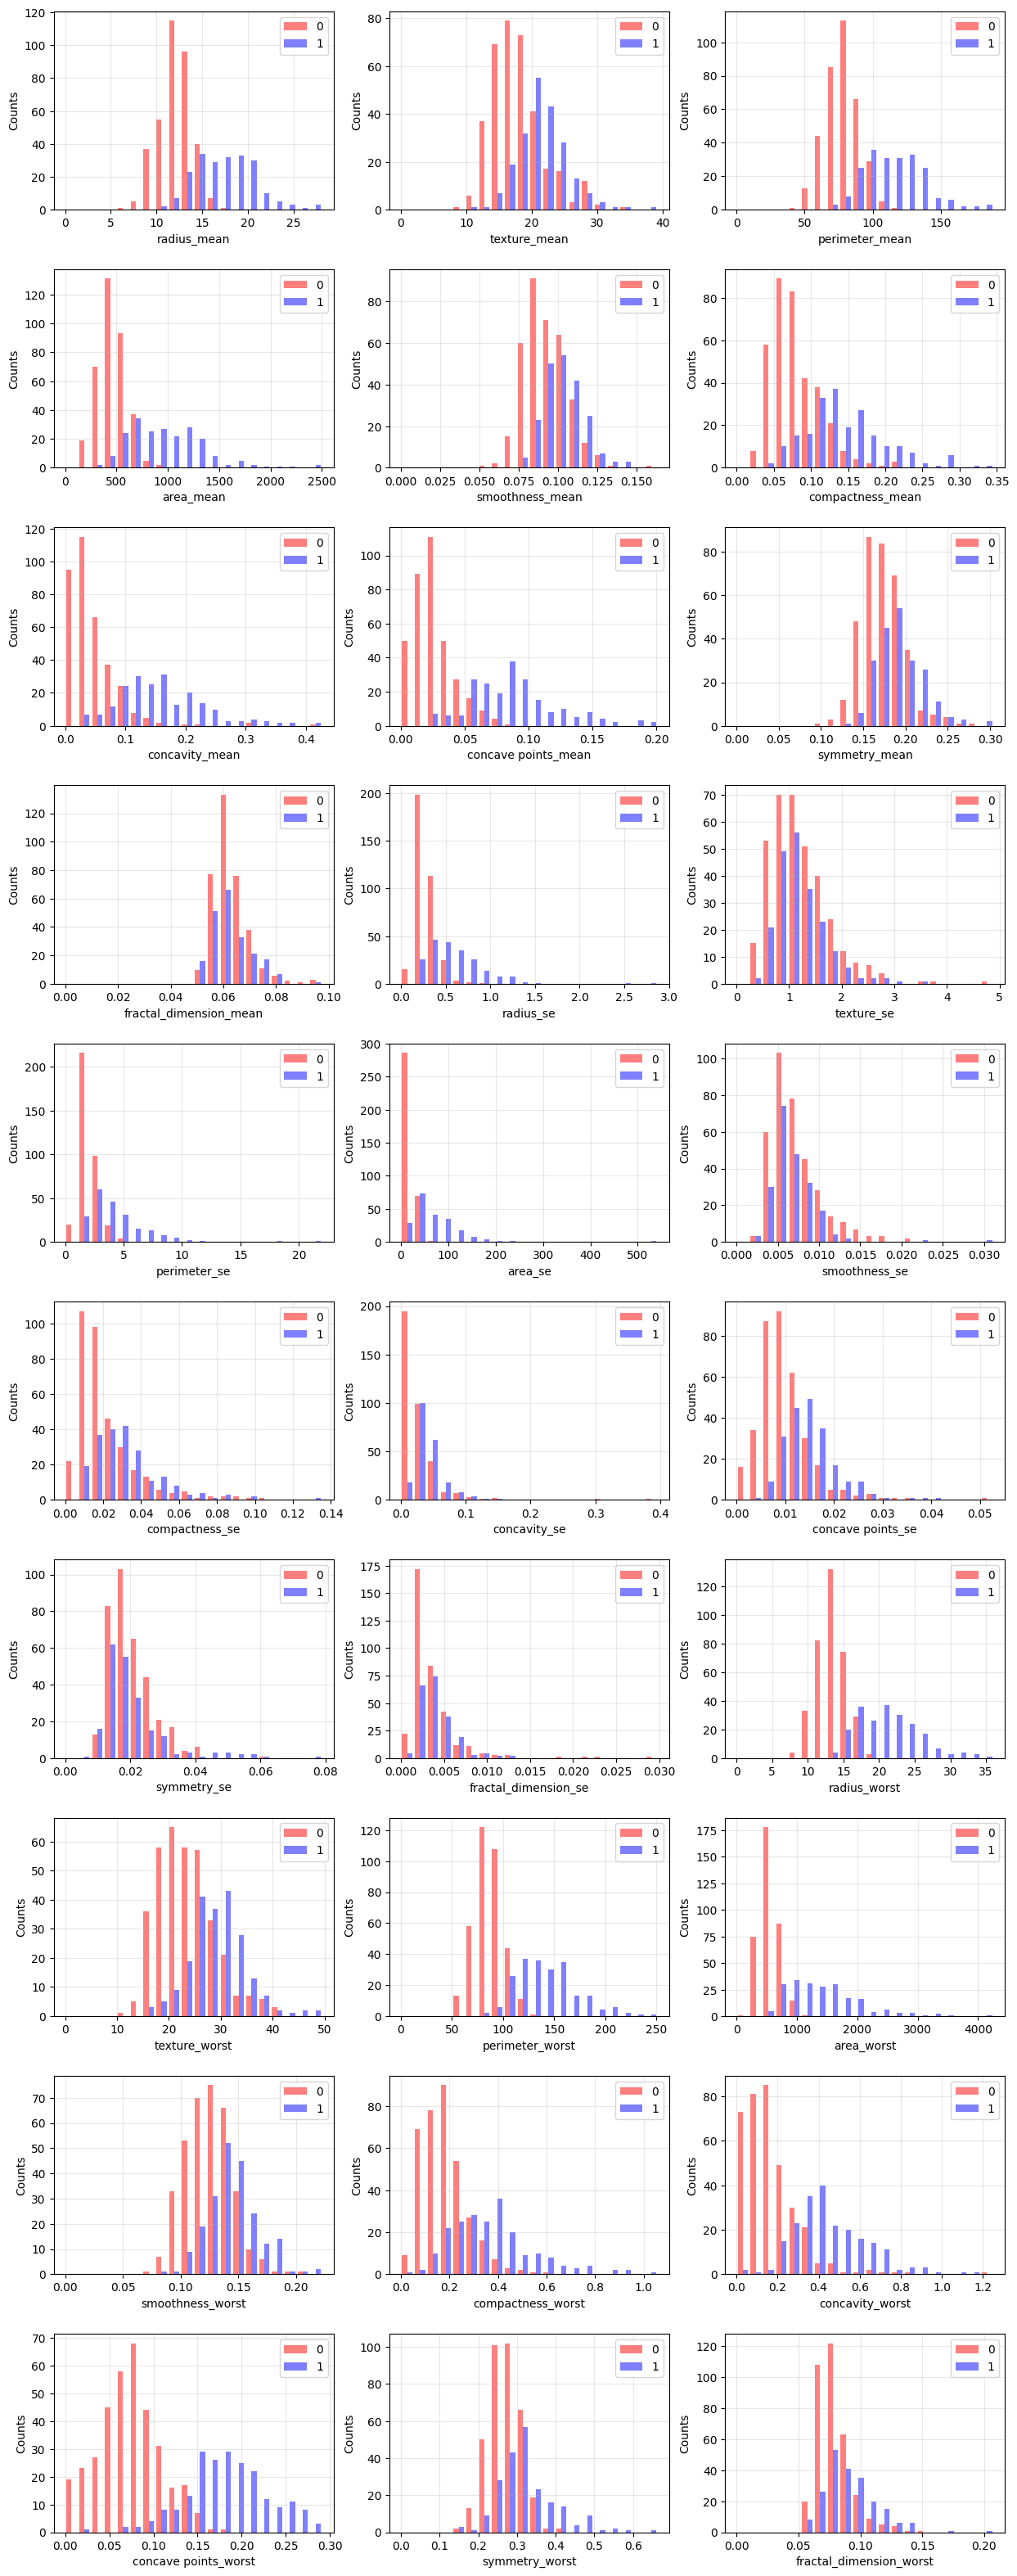

In [12]:
# Задаем размер фигуры
plt.figure(figsize=(15, 40))

for i_col in range(len(X_columns)):

    # Создаем subplot для каждого столбца
    plt.subplot(10, 3, i_col+1)

    # Получаем значения столбца и метки
    x_col = data[X_columns[i_col]].values.astype(np.float64)
    y_col = data[y_column].values

    # Рассчитываем бины и ширину бина
    bins = np.linspace(0, x_col.max(), 21)
    bin_width = bins[1] - bins[0]
    bar_width = bin_width * 0.4  # Ширина столбца как доля от ширины бина

    # Рассчитываем гистограммы
    hist_0, edges_0 = np.histogram(x_col[y_col == 0], bins=bins)
    hist_1, edges_1 = np.histogram(x_col[y_col == 1], bins=bins)

    # Корректируем границы бинов для лучшей видимости
    bin_centers_0 = (edges_0[:-1] + edges_0[1:]) / 2 - bar_width / 2
    bin_centers_1 = (edges_1[:-1] + edges_1[1:]) / 2 + bar_width / 2

    # Рисуем гистограммы
    plt.bar(bin_centers_0, hist_0, width=bar_width, color='r', alpha=0.5, label='0')
    plt.bar(bin_centers_1, hist_1, width=bar_width, color='b', alpha=0.5, label='1')

    # Настройка подписей и легенды
    plt.xlabel(X_columns[i_col])
    plt.ylabel('Counts')
    plt.legend(loc='best')

    # Включаем сетку
    plt.grid(alpha=0.3)

# Показываем графики
plt.subplots_adjust(hspace=0.3)
plt.show()


#### Для более глубокого изучения датасета можно так же строить попарные диаграммы рассеяния с раскрашеванием точек значением целевой переменной.

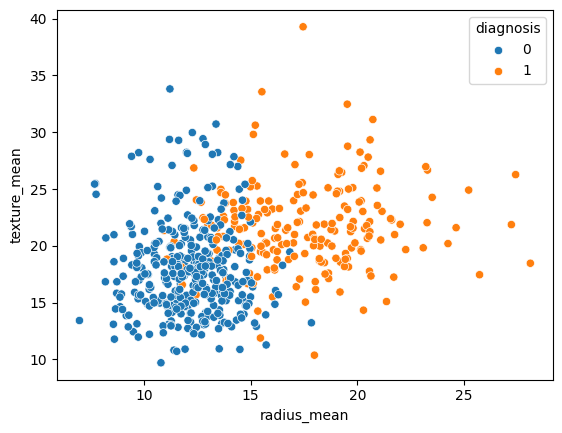

In [13]:

sns.scatterplot(data=data, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.legend(title='diagnosis')
plt.show()

#### Построим heatmap для матрицы корреляций. Возьмем абсолютное значение.

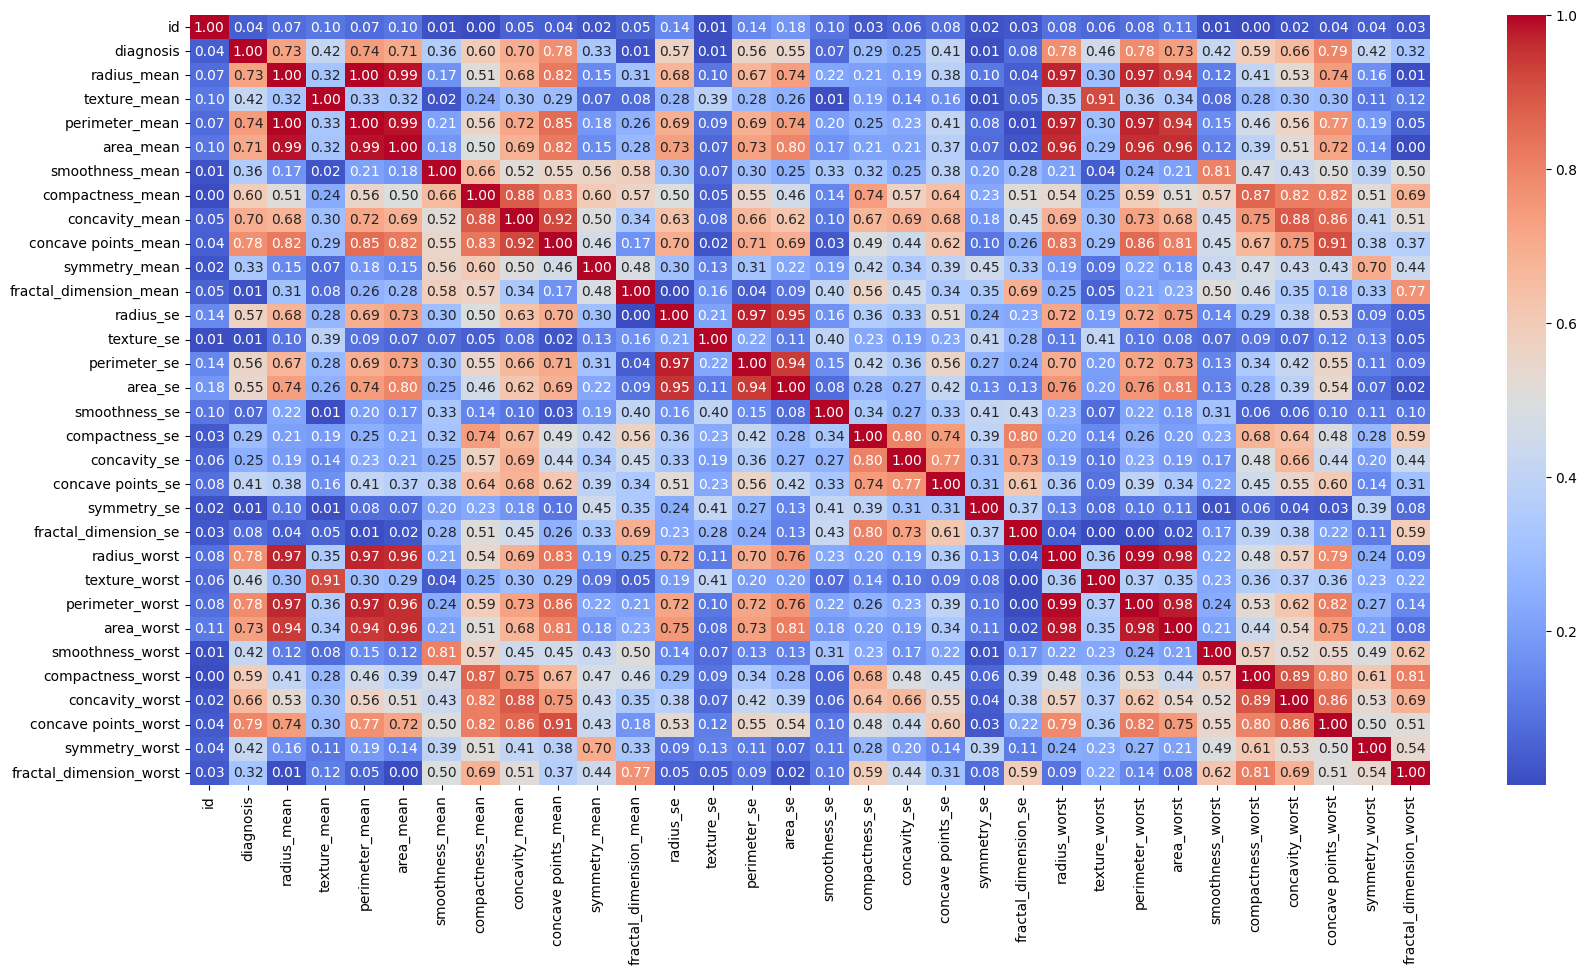

In [14]:
corr_matrix = data.corr().abs()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Некоторые признаки сильно скореллированыаны между собой. Например, radius_mean и perimeter_mean. 
Выведем список признаков, которые сильно скореллированы между собой (>0.9).

In [15]:
high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = high_corr[high_corr > 0.9].stack().reset_index().sort_values(by=0, ascending=False, ignore_index=True)
high_corr.columns = ['feature_1', 'feature_2', 'correlation']
high_corr

,feature_1,feature_2,correlation
0,radius_mean,perimeter_mean,0.997855
1,radius_worst,perimeter_worst,0.993708
2,radius_mean,area_mean,0.987357
3,perimeter_mean,area_mean,0.986507
4,radius_worst,area_worst,0.984015
5,perimeter_worst,area_worst,0.977578
6,radius_se,perimeter_se,0.972794
7,perimeter_mean,perimeter_worst,0.970387
8,radius_mean,radius_worst,0.969539
9,perimeter_mean,radius_worst,0.969476


#### Построим для сильно скоррелированных признаков попарные scatterplot-ы, наблюдается линейная зависимость.

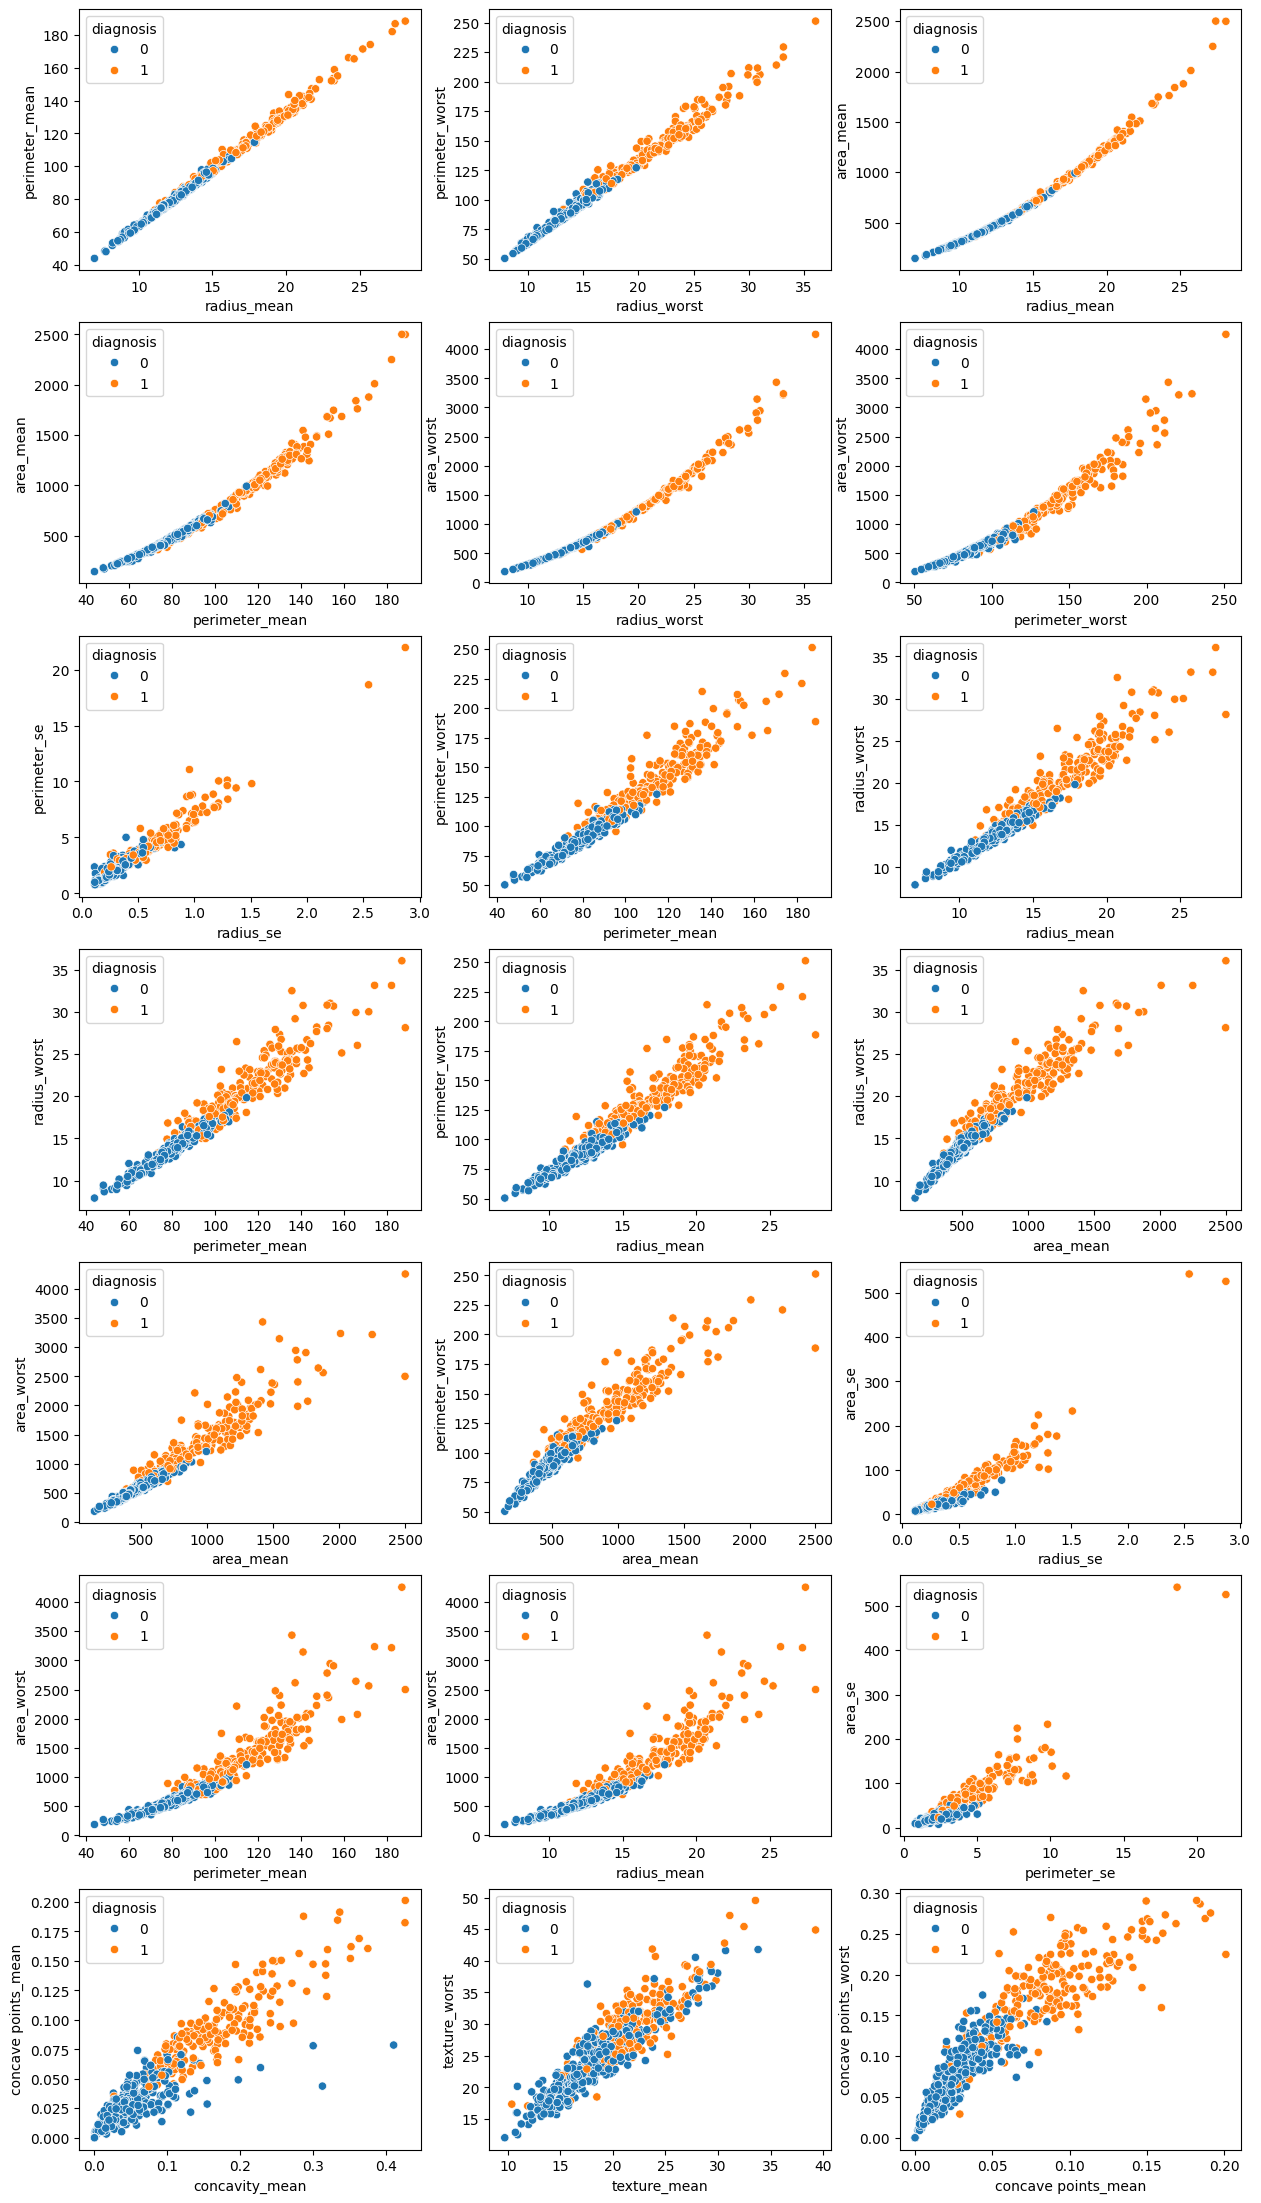

In [16]:
plt.figure(figsize=(15, 40))

for i,  (feature_1, feature_2) in enumerate(zip(high_corr['feature_1'], high_corr['feature_2'])):
    plt.subplot(10, 3, i + 1)
    sns.scatterplot(data=data, x=feature_1, y=feature_2, hue='diagnosis')

plt.show()

Используя boxplots и группировку по целевой переменной, попробуем предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

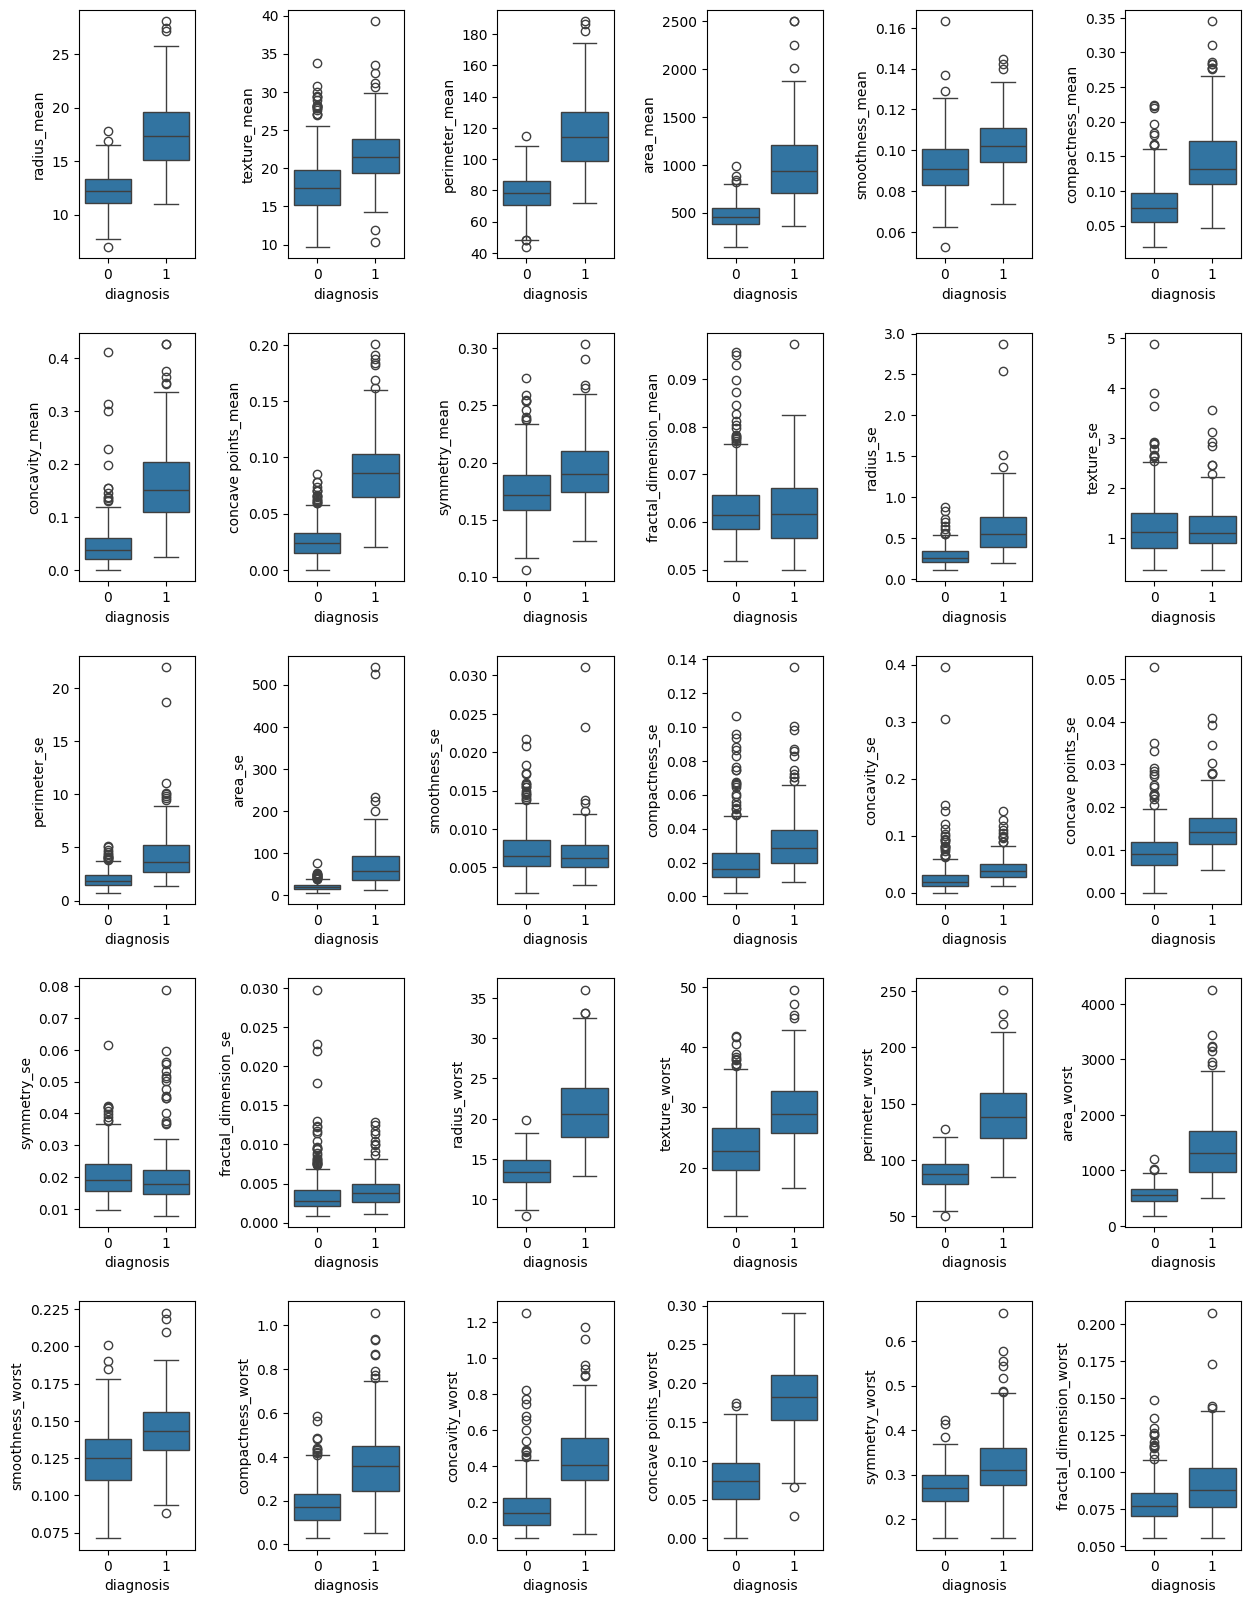

In [17]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(data.drop(columns=['id', 'diagnosis']).columns):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(data=data, x='diagnosis', y=feature)

plt.subplots_adjust(wspace=0.8, hspace=0.3)
plt.show()

Несколько признаков имеют выраженные отличия для целевой переменной. Выберем, например, perimeter_worst. 
Предположим значение для отнесения к тому или иному диагнозу и посмотрим насколько мы можем угадать результат по одному признаку.

197 33 212


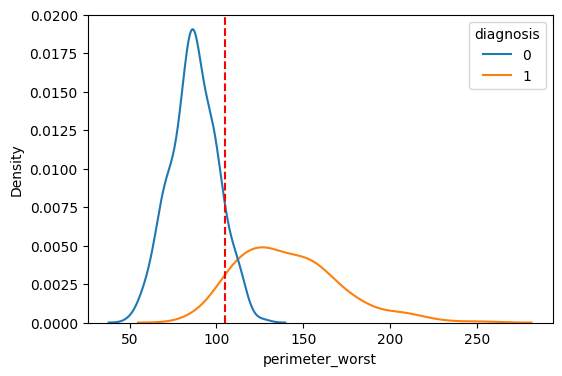

In [18]:
#Предположим значение и посчитаем TP и FP

pw_pred=105
print(len(data[(data['perimeter_worst'] > pw_pred) &(data['diagnosis']==1)]), 
len(data[(data['perimeter_worst'] > pw_pred) &(data['diagnosis']==0)]), 
len(data[data['diagnosis']==1]))

plt.figure(figsize=(6,4))
sns.kdeplot(data=data, x='perimeter_worst', hue='diagnosis')
plt.axvline(x=pw_pred, color='r', linestyle='--')
plt.show()

Разобьем данные на train-test, отложив 30% выборки для тестирования. 
Посчитаем наше предсказание и посмотрим на метрики.

In [19]:
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_test_pred_no_ml = X_test['perimeter_worst'].apply(lambda x: 1 if x > pw_pred else 0)

print(classification_report(y_test, y_test_pred_no_ml, digits=3))

roc_auc = roc_auc_score(y_test, y_test_pred_no_ml)
print(f'ROC-AUC: {roc_auc:.3f}')

confusion = confusion_matrix(y_test, y_test_pred_no_ml)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0      0.990     0.935     0.962       108
           1      0.899     0.984     0.939        63

    accuracy                          0.953       171
   macro avg      0.944     0.960     0.951       171
weighted avg      0.956     0.953     0.954       171

ROC-AUC: 0.960
Матрица ошибок:
[[101   7]
 [  1  62]]


Мы получили хороший результат предсказаний по одному признаку. Возможно можно найти второй дополняющий признак и получить еще лучший результат, а возможно можно изменить набор параметров при диагностике для нахождения более устойчивого результата.
И может быть нам удастся обойтись более простыми алгоритмами для постановки диагноза.

Перейдем  непосредственно к построению и оценке моделей.
Разобьем данные на train-test, отложив 30% выборки для тестирования.

In [20]:
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 Приведем все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко, почему стандартизация здесь нужна - разный масштаб значений признаков вызовет доминирование признаков с большими значениями и может исказить результат.

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Построим модель kNN "из коробки" без настройки параметров.

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Оценим метрики качества бинарной классификации (accuracy, precision, recall, f1_score). Построим матрицу ошибок.

In [23]:
print(classification_report(y_test, y_pred, digits=3))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0      0.963     0.972     0.968       108
           1      0.952     0.937     0.944        63

    accuracy                          0.959       171
   macro avg      0.957     0.954     0.956       171
weighted avg      0.959     0.959     0.959       171

Матрица ошибок:
[[105   3]
 [  4  59]]


Построим ROC-кривую и посчитаем площадь под ней.

ROC-AUC: 0.9787


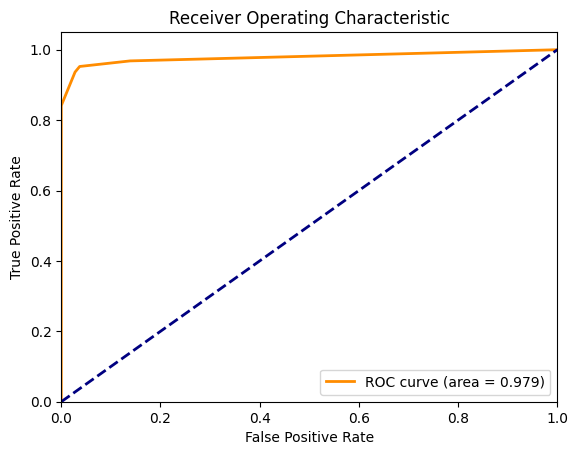

In [24]:
y_score = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Теперь проведем настройку параметра числа соседей на кросс-валидации. Снова оценим результаты, стало ли лучше!

In [25]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [26]:
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0      0.972     0.981     0.977       108
           1      0.968     0.952     0.960        63

    accuracy                          0.971       171
   macro avg      0.970     0.967     0.968       171
weighted avg      0.971     0.971     0.971       171

Матрица ошибок:
[[106   2]
 [  3  60]]


ROC-AUC: 0.981


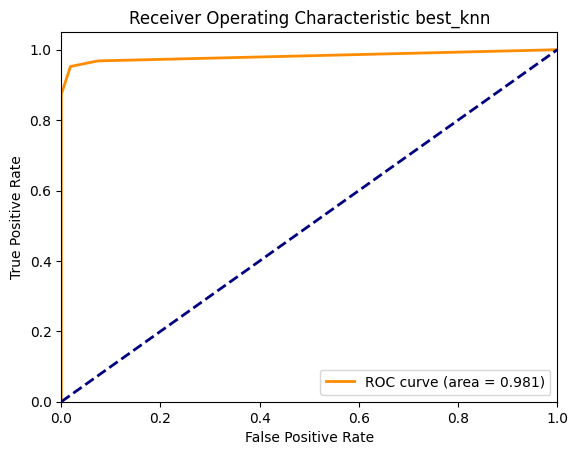

In [27]:
y_score = best_knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.3f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic best_knn')
plt.legend(loc="lower right")
plt.show()

"Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:
Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85."

Оставим пока все признаки и построим со всеми признаками )))

Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

In [28]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9907    0.9815    0.9860       108
           1     0.9688    0.9841    0.9764        63

    accuracy                         0.9825       171
   macro avg     0.9797    0.9828    0.9812       171
weighted avg     0.9826    0.9825    0.9825       171

Матрица ошибок:
[[106   2]
 [  1  62]]


ROC-AUC: 0.9979


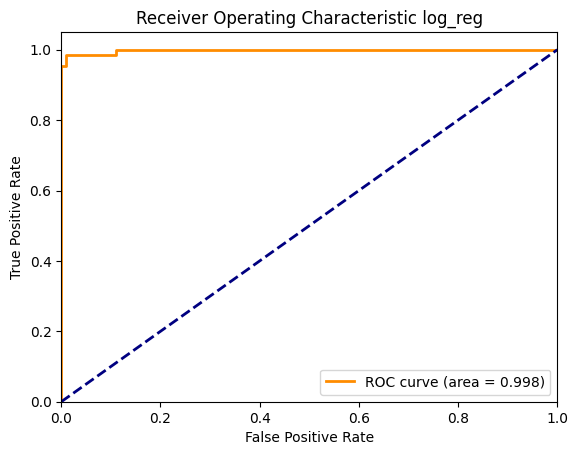

In [29]:
y_score = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic log_reg')
plt.legend(loc="lower right")
plt.show()

Теперь проведим настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV).

In [30]:
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='recall_weighted', random_state=42, max_iter=1000)
log_reg_cv.fit(X_train, y_train)

y_pred_cv = log_reg_cv.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_cv, digits=4))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9907    0.9815    0.9860       108
           1     0.9688    0.9841    0.9764        63

    accuracy                         0.9825       171
   macro avg     0.9797    0.9828    0.9812       171
weighted avg     0.9826    0.9825    0.9825       171

Матрица ошибок:
[[106   2]
 [  1  62]]


ROC-AUC: 0.9968


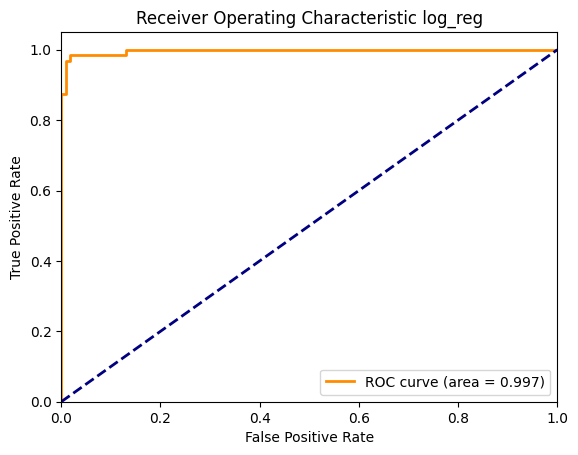

In [32]:
y_score = log_reg_cv.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_score)
print(f'ROC-AUC: {roc_auc:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic log_reg')
plt.legend(loc="lower right")
plt.show()

"Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85."

Вот теперь уберем признаки с высокой корреляцией.

In [33]:
data_fp = data.drop(columns=['id'])

correlation_matrix = data_fp.corr().abs()

upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape, dtype=bool), k=1))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

data_filtered = data_fp.drop(columns=to_drop)

print("\nДанные после удаления переменных с корреляцией > 0.85:")
data_filtered.head()


Данные после удаления переменных с корреляцией > 0.85:


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


In [34]:
X = data_filtered.drop(columns=['diagnosis'])
y = data_filtered['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

confusion = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9279    0.9537    0.9406       108
           1     0.9167    0.8730    0.8943        63

    accuracy                         0.9240       171
   macro avg     0.9223    0.9134    0.9175       171
weighted avg     0.9238    0.9240    0.9236       171

Матрица ошибок:
[[103   5]
 [  8  55]]


Получили результат хуже, чем на всех признаках. 
Теперь проведем настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV) на малом списке параметров.


In [36]:
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='recall_weighted', random_state=42, max_iter=1000)
log_reg_cv.fit(X_train, y_train)

y_pred_cv = log_reg_cv.predict(X_test)

print(classification_report(y_test, y_pred_cv, digits=4))

confusion = confusion_matrix(y_test, y_pred_cv)
print("Матрица ошибок:\n{}".format(confusion))

              precision    recall  f1-score   support

           0     0.9907    0.9815    0.9860       108
           1     0.9688    0.9841    0.9764        63

    accuracy                         0.9825       171
   macro avg     0.9797    0.9828    0.9812       171
weighted avg     0.9826    0.9825    0.9825       171

Матрица ошибок:
[[106   2]
 [  1  62]]



Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную.

ROC-AUC: 0.9868
ROC-AUC: 0.9968


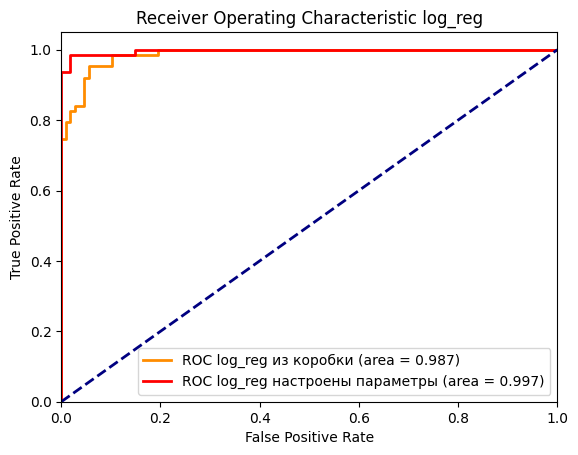

In [37]:
y_score = log_reg.predict_proba(X_test)[:, 1]
y_score_cv = log_reg_cv.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_score)
roc_auc_cv = roc_auc_score(y_test, y_score_cv)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC: {roc_auc_cv:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_score)
fpr_cv, tpr_cv, thresholds = roc_curve(y_test, y_score_cv)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC log_reg из коробки (area = %0.3f)' % roc_auc)
plt.plot(fpr_cv, tpr_cv, color='red', lw=2, label='ROC log_reg настроены параметры (area = %0.3f)' % roc_auc_cv)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic log_reg')
plt.legend(loc="lower right")
plt.show()

"Сделайте интересные выводы :)"

Результат получился действительно интересным. Если оставить все признаки в датасете, то логистическая регрессия без настройки параметров сделала такой же результат, как и с настройкой параметров. А в случае удаления линейно зависимых признаков с корреляцией Пирсона более 0.85 модель смогла показать тот же результат только после настройки параметров.

Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

В данной задаче, в итоге лучшие показатели у модели логистической регрессии. Про одинаковом количестве верно предсказанных отрицательных результатов диагноза она показала больше положительных предсказаний диагноза (в 62 случаях из 63). Что в общем-то и подтверждают метрики модели.